## SOC Data Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read in SOC_samples.csv as a pandas dataframe
sns.set_theme(style="whitegrid")
df = pd.read_csv("../soc/data/SOC_samples.csv")

df.head()

,plot_no,MgC_per_ha,MgC_SE,longitude,latitude
0,100,-5.917497,11.074052,37.443507,0.188830
1,101,5.368321,6.831054,37.442083,0.195687
2,102,-25.157348,6.005767,37.450332,0.192939
3,103,-6.361791,13.180585,37.475069,0.203932
4,104,-23.747264,4.785345,37.486095,0.176460


In [6]:
# Calculate basic statistics
soc_stats = {
    'Mean MgC/ha': df['MgC_per_ha'].mean(),
    'Median MgC/ha': df['MgC_per_ha'].median(),
    'Standard Deviation MgC/ha': df['MgC_per_ha'].std(),
    'Range MgC/ha': df['MgC_per_ha'].max() - df['MgC_per_ha'].min()
}
print("\nBasic Statistics:")
for k, v in soc_stats.items():
    print(f"{k}: {v:.2f}")


Basic Statistics:
Mean MgC/ha: -0.00
Median MgC/ha: 0.34
Standard Deviation MgC/ha: 22.69
Range MgC/ha: 116.56


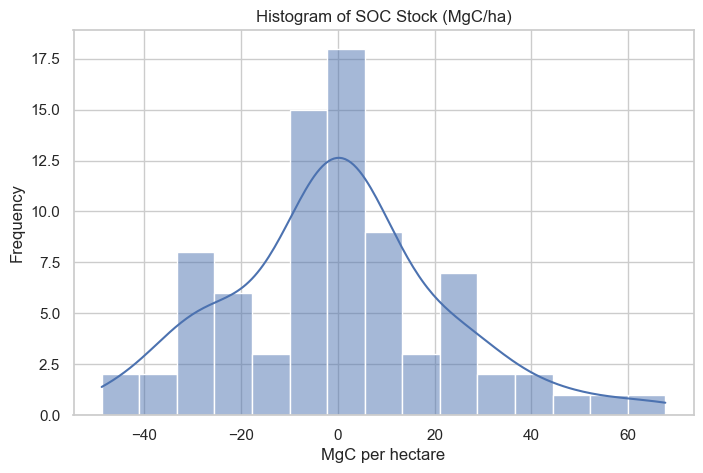

In [ ]:
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(df['MgC_per_ha'], kde=True, bins=15)
plt.title('Histogram of SOC Stock (MgC/ha)')
plt.xlabel('MgC per hectare')
plt.ylabel('Frequency')
plt.show()

# Summary statistics show there is a large spread relative to the mean, indicating high natural variability in SOC stocks 

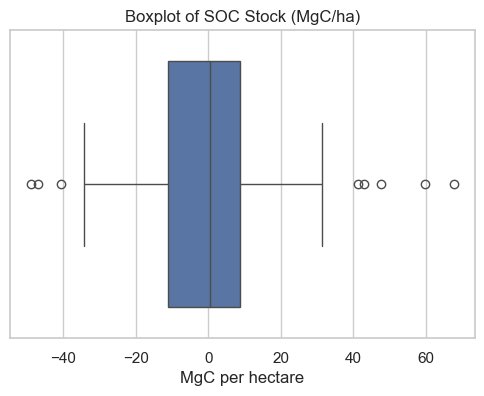

In [ ]:
# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['MgC_per_ha'])
plt.title('Boxplot of SOC Stock (MgC/ha)')
plt.xlabel('MgC per hectare')
plt.show()

In [ ]:
# Define upper and lower quartiles for outlier detection
Q1 = df['MgC_per_ha'].quantile(0.25)
Q3 = df['MgC_per_ha'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a flag
df['Outlier'] = ((df['MgC_per_ha'] < lower_bound) | (df['MgC_per_ha'] > upper_bound))

print("\nPotential Outliers:")
print(df[df['Outlier']])

# 


Potential Outliers:
   plot_no  MgC_per_ha     MgC_SE  longitude  latitude  Outlier
8      110   41.220978   5.898857  37.473683  0.217659     True
13     201  -47.031507   4.756252  37.112518  0.253401     True
17       3  -40.719436   5.075296  37.177879  0.310934     True
19      32   59.809243  22.457736  37.256652  0.269899     True
29      57   42.975286  11.694853  37.334963  0.249254     True
31      63  -48.846997   2.770743  37.155114  0.250645     True
46      83   47.588079   8.643831  37.322634  0.268461     True
61      98   67.708194  19.212829  37.431095  0.197065     True


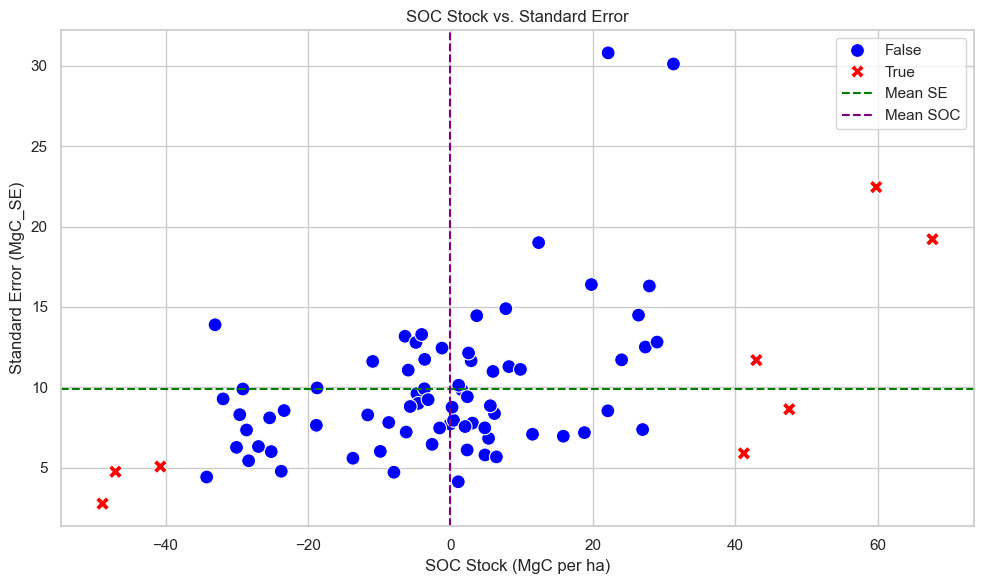

In [ ]:
# Plot SOC stock (MgC_per_ha) vs. Standard Error (MgC_SE)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MgC_per_ha', y='MgC_SE', hue='Outlier', style='Outlier', palette={True: 'red', False: 'blue'}, s=100)
plt.axhline(y=df['MgC_SE'].mean(), color='green', linestyle='--', label='Mean SE')
plt.axvline(x=df['MgC_per_ha'].mean(), color='purple', linestyle='--', label='Mean SOC')
plt.xlabel('SOC Stock (MgC per ha)')
plt.ylabel('Standard Error (MgC_SE)')
plt.title('SOC Stock vs. Standard Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()